#### Pakete laden

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Attrition vs. Turnover

https://hrforecast.com/de/mitarbeiterfluktuation-attrition-vs-turnover-was-ist-der-unterschied/#title-1-1

Attrition und Turnover sind verwandte Begriffe im Personalwesen und werden oft miteinander verwechselt. In beiden Fällen beziehen sich diese Begriffe auf den Prozess, durch den Mitarbeitende das Unternehmen verlassen. Während sich Turnover auf Entlassungen aus negativen Gründen wie Differenzen in der Unternehmenskultur und toxisches Management bezieht, ist Attrition auf natürliche Ursachen wie den Ruhestand zurückzuführen. Attrition und Turnover treten auf, wenn Mitarbeitende das Unternehmen aus unterschiedlichen Gründen verlassen, z. B. durch Entlassungen und Kündigungen. Zu den Hauptgründen für Turnover gehören:

    * Burn-out
    * Mangelnde Anerkennung
    * Schlechte Unternehmenskultur
    * Schlechte Beziehungen zum Management
    * Schlechte Lern- und Entwicklungsmöglichkeiten.

Attrition ist der Verlust von Mitarbeitenden aufgrund eines natürlichen Ereignisses oder Prozesses. Zu den Ursachen der Fluktuation gehören:

    * Ruhestand
    * Terminierung
    * Abschaffung des Arbeitsplatzes
    * Gesundheitsfragen
    * Verstorben

Der wichtigste Unterschied zwischen Attrition und Turnover ist, dass Turnover alle Entlassungen umfasst. Es umfasst also auch Jobs, deren Aufgaben von anderen Mitarbeitenden übernommen werden. Attrition spiegelt alle langfristig unbesetzten und gestrichenen Jobs wider.

In [20]:
# CSV-Datei einlesen
df = pd.read_csv("../data/WA_Fn-UseC_-HR-Employee-Attrition.csv", sep=',')

# Spaltennamen bereinigen
df.columns = df.columns.str.strip()

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [13]:
#Anzahl Zeilen
anzahl_zeilen = len(df)
print(f"Anzahl der Zeilen: {anzahl_zeilen}")

Anzahl der Zeilen: 1470


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
df.describe(include = 'object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [16]:
df.describe(include = 'int64')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Originaldatensatz mit 35 Variablen

| #  | Variable                                            | Dtype                              | Ausprägung                                                                                                                                                                                                                           | Beschreibung                                                                                              |
| -- | --------------------------------------------------- | ---------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | --------------------------------------------------------------------------------------------------------- |
| 1  | <font color='green'>Age</font>                      | <font color='green'>integer</font> | <font color='green'>18 - 60</font>                                                                                                                                                                                                   | <font color='green'>Alter</font>                                                                          |
| 2  | <font color='green'>Attrition</font>                | <font color='green'>object</font>  | <font color='green'>Yes,<br>No</font>                                                                                                                                                                                                | <font color='green'>Befragte Person<br>hat das Unternehmen verlassen</font>                               |
| 3  | <font color='green'>BusinessTravel</font>           | <font color='green'>object</font>  | <font color='green'>Non-Travel,<br>Travel_Rarely,<br>Travel_Frequently</font>                                                                                                                                                         | <font color='green'>Häufigkeit von Dienstreisen</font>                                                    |
| 4  | <font color='red'>DailyRate</font>                  | <font color='red'>integer</font>   | <font color='red'>102 - 1499</font>                                                                                                                                                                                                  | <font color='red'>Gehaltslevel (unklar)</font>                                                            |
| 5  | <font color='green'>Department</font>               | <font color='green'>object</font>  | <font color='green'>Human Resources,<br>Research & Development,<br>Sales</font>                                                                                                                                                      | <font color='green'>Abteilung</font>                                                                      |
| 6  | <font color='green'>DistanceFromHome</font>         | <font color='green'>integer</font> | <font color='green'>1 - 29</font>                                                                                                                                                                                                    | <font color='green'>Entfernung zwischen<br>Arbeitsplatz und Wohnung</font>                                |
| 7  | <font color='green'>Education</font>                | <font color='green'>integer</font> | <font color='green'>1 - Below College<br>2 - College<br>3 - Bachelor<br>4 - Master<br>5 - Doctor</font>                                                                                                                              | <font color='green'>Bildungsniveau</font>                                                                 |
| 8  | <font color='green'>EducationField</font>           | <font color='green'>object</font>  | <font color='green'>Life Sciences,<br>Other,<br>Medical,<br>Marketing,<br>Technical Degree,<br>Human Resources</font>                                                                                                                | <font color='green'>Ausbildungsbereich</font>                                                             |
| 9  | <font color='grey'>EmployeeCount</font>             | <font color='grey'>integer</font>  | <font color='grey'>1</font>                                                                                                                                                                                                          | <font color='grey'>irrelevant,<br>da nur eine Ausprägung</font>                                           |
| 10 | <font color='green'>EmployeeNumber</font>           | <font color='green'>integer</font> | <font color='green'>1 - 1068</font>                                                                                                                                                                                                  | <font color='green'>Anzahl der Mitarbeiter<br>im Unternehmen</font>                                       |
| 11 | <font color='green'>EnvironmentSatisfaction</font>  | <font color='green'>integer</font> | <font color='green'>1 - Low<br>2 - Medium<br>3 - High<br>4 - Very High</font>                                                                                                                                                        | <font color='green'>Zufriedenheit<br>mit der Arbeitsumgebung</font>                                       |
| 12 | <font color='green'>Gender</font>                   | <font color='green'>object</font>  | <font color='green'>Male,<br>Female</font>                                                                                                                                                                                           | <font color='green'>Geschlecht</font>                                                                     |
| 13 | <font color='green'>HourlyRate</font>               | <font color='green'>integer</font> | <font color='green'>30 - 100</font>                                                                                                                                                                                                  | <font color='green'>Stundenlohn</font>                                                                    |
| 14 | <font color='green'>JobInvolvement</font>           | <font color='green'>integer</font> | <font color='green'>1 - Low<br>2 - Medium<br>3 - High<br>4 - Very High</font>                                                                                                                                                        | <font color='green'>Job-Engagement</font>                                                                 |
| 15 | <font color='red'>JobLevel</font>                   | <font color='red'>integer</font>   | <font color='red'>1 - 5</font>                                                                                                                                                                                                       | <font color='red'>Ausprägungen unklar</font>                                                              |
| 16 | <font color='green'>JobRole</font>                  | <font color='green'>object</font>  | <font color='green'>Sales Executive,<br>Research Scientist,<br>Laboratory Technician,<br>Manufacturing Director,<br>Healthcare, Representative,<br>Manager,<br>Sales Representative,<br>Research Director,<br>Human Resources</font> | <font color='green'>Stellenbeschreibung</font>                                                            |
| 17 | <font color='green'>JobSatisfaction</font>          | <font color='green'>integer</font> | <font color='green'>1 - Low<br>2 - Medium<br>3 - High<br>4 - Very High</font>                                                                                                                                                        | <font color='green'>Zufriedenheit<br>mit der Arbeit</font>                                                |
| 18 | <font color='green'>MaritalStatus</font>            | <font color='green'>object</font>  | <font color='green'>Married,<br>Divorced,<br>Single</font>                                                                                                                                                                           | <font color='green'>Familienstand</font>                                                                  |
| 19 | <font color='green'>MonthlyIncome</font>            | <font color='green'>integer</font> | <font color='green'>1.009 - 19.999</font>                                                                                                                                                                                            | <font color='green'>monatliches Einkommen</font>                                                          |
| 20 | <font color='red'>MonthlyRate</font>                | <font color='red'>integer</font>   | <font color='red'>2.094 -26.999</font>                                                                                                                                                                                               | <font color='red'>unklar</font>                                                                           |
| 21 | <font color='green'>NumCompaniesWorked</font>       | <font color='green'>integer</font> | <font color='green'>0 - 9 </font>                                                                                                                                                                                                    | <font color='green'>Anzahl der<br>bisherigen Arbeitgeber</font>                                           |
| 22 | <font color='grey'>Over18</font>                    | <font color='grey'>object</font>   | <font color='grey'>Yes</font>                                                                                                                                                                                                        | <font color='grey'>irrelevant,<br>da nur eine Ausprägung</font>                                           |
| 23 | <font color='green'>OverTime</font>                 | <font color='green'>object</font>  | <font color='green'>Yes,<br>No</font>                                                                                                                                                                                                | <font color='green'>Überstunden</font>                                                                    |
| 24 | <font color='red'>PercentSalaryHike</font>          | <font color='red'>integer</font>   | <font color='red'>11 - 25</font>                                                                                                                                                                                                     | <font color='red'>prozentuale Gehaltserhöhung<br>(pro Jahr?)</font>                                       |
| 25 | <font color='red'>PerformanceRating</font>          | <font color='red'>integer</font>   | <font color='red'>1 - Low<br>2 - Good<br>3 - Excellent<br>4 - Outstanding</font>                                                                                                                                                     | <font color='red'>Leistungsbewertung<br>(aus dienstlicher Beurteilung<br>oder Selbsteinschätzung?)</font> |
| 26 | <font color='green'>RelationshipSatisfaction</font> | <font color='green'>integer</font> | <font color='green'>1 - Low<br>2 - Medium<br>3 - High<br>4 - Very High</font>                                                                                                                                                        | <font color='green'>Zufriedenheit mit<br>sozialem Umfeld am Arbeitsplatz</font>                           |
| 27 | <font color='grey'>StandardHours</font>             | <font color='grey'>integer</font>  | <font color='grey'>80</font>                                                                                                                                                                                                         | <font color='grey'>irrelevant,<br>da nur eine Ausprägung</font>                                           |
| 28 | <font color='red'>StockOptionLevel</font>           | <font color='red'>integer</font>   | <font color='red'>1 - 3</font>                                                                                                                                                                                                       | <font color='red'>Aktienoptionen (unklar)</font>                                                          |
| 29 | <font color='green'>TotalWorkingYears</font>        | <font color='green'>integer</font> | <font color='green'>0 - 40</font>                                                                                                                                                                                                    | <font color='green'>Arbeitsjahre</font>                                                                   |
| 30 | <font color='red'>TrainingTimesLastYear</font>      | <font color='red'>integer</font>   | <font color='red'>0 - 6</font>                                                                                                                                                                                                       | <font color='red'>Zeit für Fort-/Weiterbildung<br>in Stunden (unklar)</font>                              |
| 31 | <font color='green'>WorkLifeBalance</font>          | <font color='green'>integer</font> | <font color='green'>1 - Bad<br>2 - Good<br>3 - Better<br>4 - Best</font>                                                                                                                                                             | <font color='green'>Work-Life-Balance</font>                                                              |
| 32 | <font color='green'>YearsAtCompany</font>           | <font color='green'>integer</font> | <font color='green'>0 - 40</font>                                                                                                                                                                                                    | <font color='green'>Anzahl der Jahre<br>im Unternehmen</font>                                             |
| 33 | <font color='green'>YearsInCurrentRole</font>       | <font color='green'>integer</font> | <font color='green'>0 - 18</font>                                                                                                                                                                                                    | <font color='green'>Anzahl der Jahre<br>auf der aktuellen Stelle</font>                                   |
| 34 | <font color='green'>YearsSinceLastPromotion</font>  | <font color='green'>integer</font> | <font color='green'>0 - 15</font>                                                                                                                                                                                                    | <font color='green'>Jahre seit der<br>letzten Beförderung</font>                                          |
| 35 | <font color='green'>YearsWithCurrManager</font>     | <font color='green'>integer</font> | <font color='green'>0 - 17</font>                                                                                                                                                                                                    | <font color='green'>Anzahl der Jahre<br>unter dem aktuellen Vorgesetzten</font>                           |

#### Eindeutige Variablen

* **3 Variablen**  (EmployeeCount, Over18 und StandardHours) haben jeweils nur eine Ausprägung und sind daher irrelevant für die späteren Auswertungen
* Bei **7 Variablenn sind die Ausprägungen unklar** (DailyRate, JobLevel, MonthlyRate, PercentSalaryHike, PerformanceRating, StockOptionLevel, TrainingTimesLastYear). Daher sollte hier geprüft werden, inwiefern sie für spätere Auswertungen herangezogen werden können
* Damit bleiben folgende **25 eindeutige Variablen** für die Analyse übrig
* Als Zielvariable soll die Variable **Attrition** dienen



| Variable                                            | Dtype                                  | Ausprägung                                                                                                                                                                                                                           | Beschreibung                                                                    |
| --------------------------------------------------- | -------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | ------------------------------------------------------------------------------- |
| <font color='green'>Age</font>                      | <font color='green'>integer</font>     | <font color='green'>18 - 60</font>                                                                                                                                                                                                   | <font color='green'>Alter</font>                                                |
| <font color='green'>Attrition</font>                | <font color='green'>object</font>      | <font color='green'>Yes,<br>No</font>                                                                                                                                                                                                | <font color='green'>Befragte Person<br>hat das Unternehmen verlassen</font>     |
| <font color='green'>BusinessTravel</font>           | <font color='green'>object</font>      | <font color='green'>Non-Travel,<br>Travel_Rarely,<br>Travel_Frequently</font>                                                                                                                                                         | <font color='green'>Häufigkeit von Dienstreisen</font>                          |
| <font color='green'>Department</font>               | <font color='green'>object</font>      | <font color='green'>Human Resources,<br>Research & Development,<br>Sales</font>                                                                                                                                                      | <font color='green'>Abteilung</font>                                            |
| <font color='green'>DistanceFromHome</font>         | <font color='green'>integer</font>     | <font color='green'>1 - 29</font>                                                                                                                                                                                                    | <font color='green'>Entfernung zwischen<br>Arbeitsplatz und Wohnung</font>      |
| <font color='green'>Education</font>                | <font color='green'>integer</font>     | <font color='green'>1 - Below College<br>2 - College<br>3 - Bachelor<br>4 - Master<br>5 - Doctor</font>                                                                                                                              | <font color='green'>Bildungsniveau</font>                                       |
| <font color='green'>EducationField</font>           | <font color='green'>object</font>      | <font color='green'>Life Sciences,<br>Other,<br>Medical,<br>Marketing,<br>Technical Degree,<br>Human Resources</font>                                                                                                                | <font color='green'>Ausbildungsbereich</font>                                   |
| <font color='green'>EmployeeNumber</font>           | <font color='green'>integer</font>     | <font color='green'>1 - 1068</font>                                                                                                                                                                                                  | <font color='green'>Anzahl der Mitarbeiter<br>im Unternehmen</font>             |
| <font color='green'>EnvironmentSatisfaction</font>  | <font color='green'>integer</font>     | <font color='green'>1 - Low<br>2 - Medium<br>3 - High<br>4 - Very High</font>                                                                                                                                                        | <font color='green'>Zufriedenheit<br>mit der Arbeitsumgebung</font>             |
| <font color='green'>Gender</font>                   | <font color='green'>object</font>      | <font color='green'>Male,<br>Female</font>                                                                                                                                                                                           | <font color='green'>Geschlecht</font>                                           |
| <font color='green'>~~HourlyRate~~</font>           | <font color='green'>~~integer~~</font> | <font color='green'>~~30 - 100~~</font>                                                                                                                                                                                              | <font color='green'>~~Stundenlohn~~</font>                                      |
| <font color='green'>JobInvolvement</font>           | <font color='green'>integer</font>     | <font color='green'>1 - Low<br>2 - Medium<br>3 - High<br>4 - Very High</font>                                                                                                                                                        | <font color='green'>Job-Engagement</font>                                       |
| <font color='green'>JobRole</font>                  | <font color='green'>object</font>      | <font color='green'>Sales Executive,<br>Research Scientist,<br>Laboratory Technician,<br>Manufacturing Director,<br>Healthcare, Representative,<br>Manager,<br>Sales Representative,<br>Research Director,<br>Human Resources</font> | <font color='green'>Stellenbeschreibung</font>                                  |
| <font color='green'>JobSatisfaction</font>          | <font color='green'>integer</font>     | <font color='green'>1 - Low<br>2 - Medium<br>3 - High<br>4 - Very High</font>                                                                                                                                                        | <font color='green'>Zufriedenheit<br>mit der Arbeit</font>                      |
| <font color='green'>MaritalStatus</font>            | <font color='green'>object</font>      | <font color='green'>Married,<br>Divorced,<br>Single</font>                                                                                                                                                                           | <font color='green'>Familienstand</font>                                        |
| <font color='green'>MonthlyIncome</font>            | <font color='green'>integer</font>     | <font color='green'>1.009 - 19.999</font>                                                                                                                                                                                            | <font color='green'>monatliches Einkommen</font>                                |
| <font color='green'>NumCompaniesWorked</font>       | <font color='green'>integer</font>     | <font color='green'>0 - 9 </font>                                                                                                                                                                                                    | <font color='green'>Anzahl der<br>bisherigen Arbeitgeber</font>                 |
| <font color='green'>OverTime</font>                 | <font color='green'>object</font>      | <font color='green'>Yes,<br>No</font>                                                                                                                                                                                                | <font color='green'>Überstunden</font>                                          |
| <font color='green'>RelationshipSatisfaction</font> | <font color='green'>integer</font>     | <font color='green'>1 - Low<br>2 - Medium<br>3 - High<br>4 - Very High</font>                                                                                                                                                        | <font color='green'>Zufriedenheit mit<br>sozialem Umfeld am Arbeitsplatz</font> |
| <font color='green'>TotalWorkingYears</font>        | <font color='green'>integer</font>     | <font color='green'>0 - 40</font>                                                                                                                                                                                                    | <font color='green'>Arbeitsjahre</font>                                         |
| <font color='green'>WorkLifeBalance</font>          | <font color='green'>integer</font>     | <font color='green'>1 - Bad<br>2 - Good<br>3 - Better<br>4 - Best</font>                                                                                                                                                             | <font color='green'>Work-Life-Balance</font>                                    |
| <font color='green'>YearsAtCompany</font>           | <font color='green'>integer</font>     | <font color='green'>0 - 40</font>                                                                                                                                                                                                    | <font color='green'>Anzahl der Jahre<br>im Unternehmen</font>                   |
| <font color='green'>YearsInCurrentRole</font>       | <font color='green'>integer</font>     | <font color='green'>0 - 18</font>                                                                                                                                                                                                    | <font color='green'>Anzahl der Jahre<br>auf der aktuellen Stelle</font>         |
| <font color='green'>YearsSinceLastPromotion</font>  | <font color='green'>integer</font>     | <font color='green'>0 - 15</font>                                                                                                                                                                                                    | <font color='green'>Jahre seit der<br>letzten Beförderung</font>                |
| <font color='green'>YearsWithCurrManager</font>     | <font color='green'>integer</font>     | <font color='green'>0 - 17</font>                                                                                                                                                                                                    | <font color='green'>Anzahl der Jahre<br>unter dem aktuellen Vorgesetzten</font> |

In [17]:
# Zielvariable Attrition
attrition = df["Attrition"].value_counts()
print(attrition)

Attrition
No     1233
Yes     237
Name: count, dtype: int64


<img src='../images/bar.png' width="100%" align="center" />

### Gehaltsvariablen
<img src='../images/bar.png' width="100%" align="center" />

In [6]:
# Prüfung, ob Korrelationen zwischen GehaltsVariablenn DailyRate, HourlyRate, MonthlyRate und MonthlyIncome bestehen

Gehalt = df[['DailyRate','HourlyRate','MonthlyRate','MonthlyIncome']]
print(Gehalt)

Gehalt.corr()

      DailyRate  HourlyRate  MonthlyRate  MonthlyIncome
0          1102          94        19479           5993
1           279          61        24907           5130
2          1373          92         2396           2090
3          1392          56        23159           2909
4           591          40        16632           3468
...         ...         ...          ...            ...
1465        884          41        12290           2571
1466        613          42        21457           9991
1467        155          87         5174           6142
1468       1023          63        13243           5390
1469        628          82        10228           4404

[1470 rows x 4 columns]


,DailyRate,HourlyRate,MonthlyRate,MonthlyIncome
DailyRate,1.000000,0.023381,-0.032182,0.007707
HourlyRate,0.023381,1.000000,-0.015297,-0.015794
MonthlyRate,-0.032182,-0.015297,1.000000,0.034814
MonthlyIncome,0.007707,-0.015794,0.034814,1.000000


<Axes: >

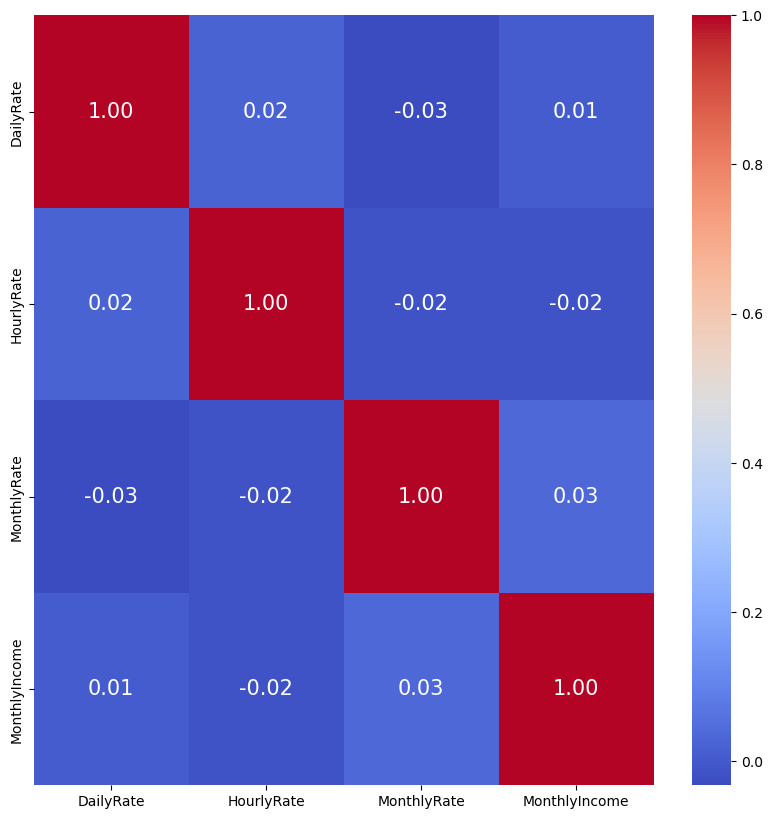

In [7]:
# Correlation Matrix

plt.figure(figsize=(10,10))
sns.heatmap(Gehalt.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":15})

#### Definition von DailyRate, HourlyRate und MonthlyRate

https://everythingatwork.com/knowledge-base/daily-rate-and-monthly-rate-employees/

**Introduction**

When it comes to salary rates, there are 2 types: Monthly Rate and Daily Rate. Some companies do apply the Hourly Rate, but this follows the same principles applied to the Daily Rate.

In essence, daily-rate and monthly rate employees are the same. Both types of employees are paid for the amount of time they put in at work.

The main difference is that daily-rate employees are paid based on the actual # of days worked, while monthly-rate employees are paid a fixed amount per pay period, assuming that they had no absences.

If an employee’s daily-rate is P500.00 and the employee worked for 10 days, that equates to a pay of P5,000.00. Given this, the salary of a daily-rate employee may vary each pay period, depending on the actual # of working days included in that period.

Monthly-rate employees are paid a fixed amount per pay period, regardless of the # of actual working days included in the period.

So if an employee’s monthly rate is P15,000.00, the employee will be paid the same amount in February as well as in March, even if February is a much shorter month than March.

The monthly rate came about mainly for convenience’s sake, since it is easier to compute for and pay a fixed payroll amount per period.
[...]

#### Aussagekraft von DailyRate, HourlyRate und MonthlyRate im df

Da die Aussagekraft der drei Gehaltsvariablen DailyRate, HourlyRate und MonthlyRate nicht klar ist, sollte in späteren Auswertungen nur die Variable **MonthlyIncome** herangezogen werden und die anderen drei Gehaltsvariablen ignoriert werden.

Somit entfällt die Variable <font color='red'>**HourlyRate**</font>, das ursprünglich als eideutige Variable eingestuft wurde, für spätere Auswertungen.

<img src='../images/bar.png' width="100%" align="center" />

### Zufriedenheitsvariablen
<img src='../images/bar.png' width="100%" align="center" />

Die folgenden drei Variablen sagen etwas über die Zufriedenheit der Mitarbeiter aus:

* EnvironmentSatisfaction
* JobSatisfaction
* RelationshipSatisfaction

Die Ausprägungen dieser Variablen sind:

* 1 - Low
* 2 - Medium
* 3 - High
* 4 - Very High


Frage: Besteht eine Korrelation zwischen diesen Variablenn?


In [8]:
# Prüfung, ob Korrelationen zwischen den ZufriedenheitsVariablenn besteht

Satisfaction = df[['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction']]
print(Satisfaction)

Satisfaction.corr()

      EnvironmentSatisfaction  JobSatisfaction  RelationshipSatisfaction
0                           2                4                         1
1                           3                2                         4
2                           4                3                         2
3                           4                3                         3
4                           1                2                         4
...                       ...              ...                       ...
1465                        3                4                         3
1466                        4                1                         1
1467                        2                2                         2
1468                        4                2                         4
1469                        2                3                         1

[1470 rows x 3 columns]


,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction
EnvironmentSatisfaction,1.000000,-0.006784,0.007665
JobSatisfaction,-0.006784,1.000000,-0.012454
RelationshipSatisfaction,0.007665,-0.012454,1.000000


<Axes: >

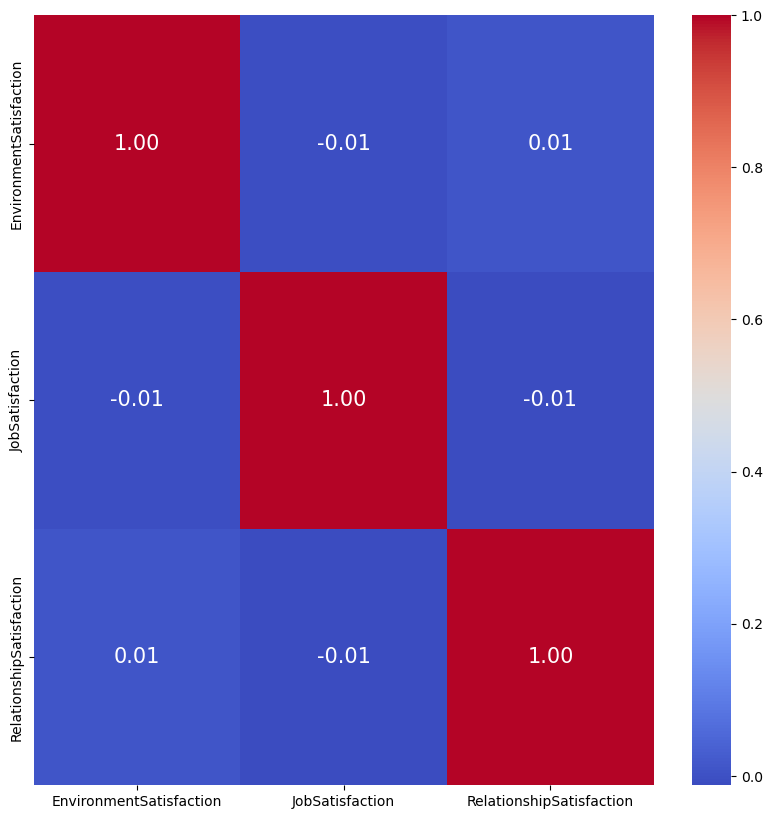

In [9]:
# Correlation Matrix

plt.figure(figsize=(10,10))
sns.heatmap(Satisfaction.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":15})

<img src='../images/bar.png' width="100%" align="center" />

### Gibt es überhaupt Zusammenhänge?
<img src='../images/bar.png' width="100%" align="center" />

Für die Berechnung von Korrelationen werden zunächst alle Variablen mit dem Datentyp "object" in numerische Variablen umgewandelt

| Variable                                  | Dtype                             | Ausprägung                                                                                                                                                                                                                                                               | Beschreibung                                                                |
| ----------------------------------------- | --------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | --------------------------------------------------------------------------- |
| <font color='green'>Attrition</font>      | <font color='green'>object</font> | <font color='green'>1 - Yes,<br>0 - No</font>                                                                                                                                                                                                                            | <font color='green'>Befragte Person<br>hat das Unternehmen verlassen</font> |
| <font color='green'>BusinessTravel</font> | <font color='green'>object</font> | <font color='green'>0 - Non-Travel,<br>1 - Travel_Rarely,<br>2 - Travel_Frequently</font>                                                                                                                                                                                 | <font color='green'>Häufigkeit von Dienstreisen</font>                      |
| <font color='green'>Department</font>     | <font color='green'>object</font> | <font color='green'>0 - Human Resources,<br>1 - Research & Development,<br>2 - Sales</font>                                                                                                                                                                              | <font color='green'>Abteilung</font>                                        |
| <font color='green'>EducationField</font> | <font color='green'>object</font> | <font color='green'>0 - Life Sciences,<br>1 - Other,<br>2 - Marketing,<br>3 - Medical,<br>4 - Technical Degree,<br>5 - Human Resources</font>                                                                                                                            | <font color='green'>Ausbildungsbereich</font>                               |
| <font color='green'>Gender</font>         | <font color='green'>object</font> | <font color='green'>0 - Male,<br>1 - Female</font>                                                                                                                                                                                                                       | <font color='green'>Geschlecht</font>                                       |
| <font color='green'>JobRole</font>        | <font color='green'>object</font> | <font color='green'>0 - Sales Executive,<br>1 - Research Scientist,<br>2 - Laboratory Technician,<br>3 - Manufacturing Director,<br>4 - Healthcare, Representative,<br>5 - Manager,<br>6 - Sales Representative,<br>7 - Research Director,<br>8 - Human Resources</font> | <font color='green'>Stellenbeschreibung</font>                              |
| <font color='green'>MaritalStatus</font>  | <font color='green'>object</font> | <font color='green'>0 - Married,<br>1 - Divorced,<br>2 - Single</font>                                                                                                                                                                                                   | <font color='green'>Familienstand</font>                                    |
| <font color='green'>OverTime</font>       | <font color='green'>object</font> | <font color='green'>1 - Yes,<br>0 - No</font>                                                                                                                                                                                                                            | <font color='green'>Überstunden</font>                                      |

In [25]:
# Auswahl der eindeutigen Variablen

df2 = df[['Attrition','Age','BusinessTravel','Department','DistanceFromHome','Education','EducationField','EmployeeNumber','EnvironmentSatisfaction','Gender','HourlyRate','JobInvolvement','JobRole','JobSatisfaction','MaritalStatus','MonthlyIncome','NumCompaniesWorked','OverTime','RelationshipSatisfaction','TotalWorkingYears','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]


In [26]:
# replacing values

df2['Attrition'].replace(['No', 'Yes'],[0, 1], inplace=True)
df2['OverTime'].replace(['No', 'Yes'],[0, 1], inplace=True)
df2['Gender'].replace(['Male', 'Female'],[0, 1], inplace=True)

df2['BusinessTravel'].replace(['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'],[0, 1, 2], inplace=True)
df2['Department'].replace(['Human Resources', 'Research & Development', 'Sales'],[0, 1, 2], inplace=True)
df2['MaritalStatus'].replace(['Married', 'Divorced', 'Single'],[0, 1, 2], inplace=True)
df2['EducationField'].replace(['Life Sciences', 'Other', 'Marketing', 'Medical', 'Technical Degree', 'Human Resources'],[0, 1, 2, 3, 4, 5], inplace=True)
df2['JobRole'].replace(['Sales Executive','Research Scientist','Laboratory Technician','Manufacturing Director','Healthcare Representative','Manager','Sales Representative','Research Director','Human Resources'],[0, 1, 2, 3, 4, 5, 6, 7, 8], inplace=True)


C:\Users\natal\AppData\Local\Temp\ipykernel_17124\1948079741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Attrition'].replace(['No', 'Yes'],[0, 1], inplace=True)
C:\Users\natal\AppData\Local\Temp\ipykernel_17124\1948079741.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['OverTime'].replace(['No', 'Yes'],[0, 1], inplace=True)
C:\Users\natal\AppData\Local\Temp\ipykernel_17124\1948079741.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Attrition                 1470 non-null   int64
 1   Age                       1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   Department                1470 non-null   int64
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int64
 7   EmployeeNumber            1470 non-null   int64
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int64
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobRole                   1470 non-null   int64
 13  JobSatisfaction           1470 non-null   int64
 14  MaritalStatus             1470 non-null 

<Axes: >

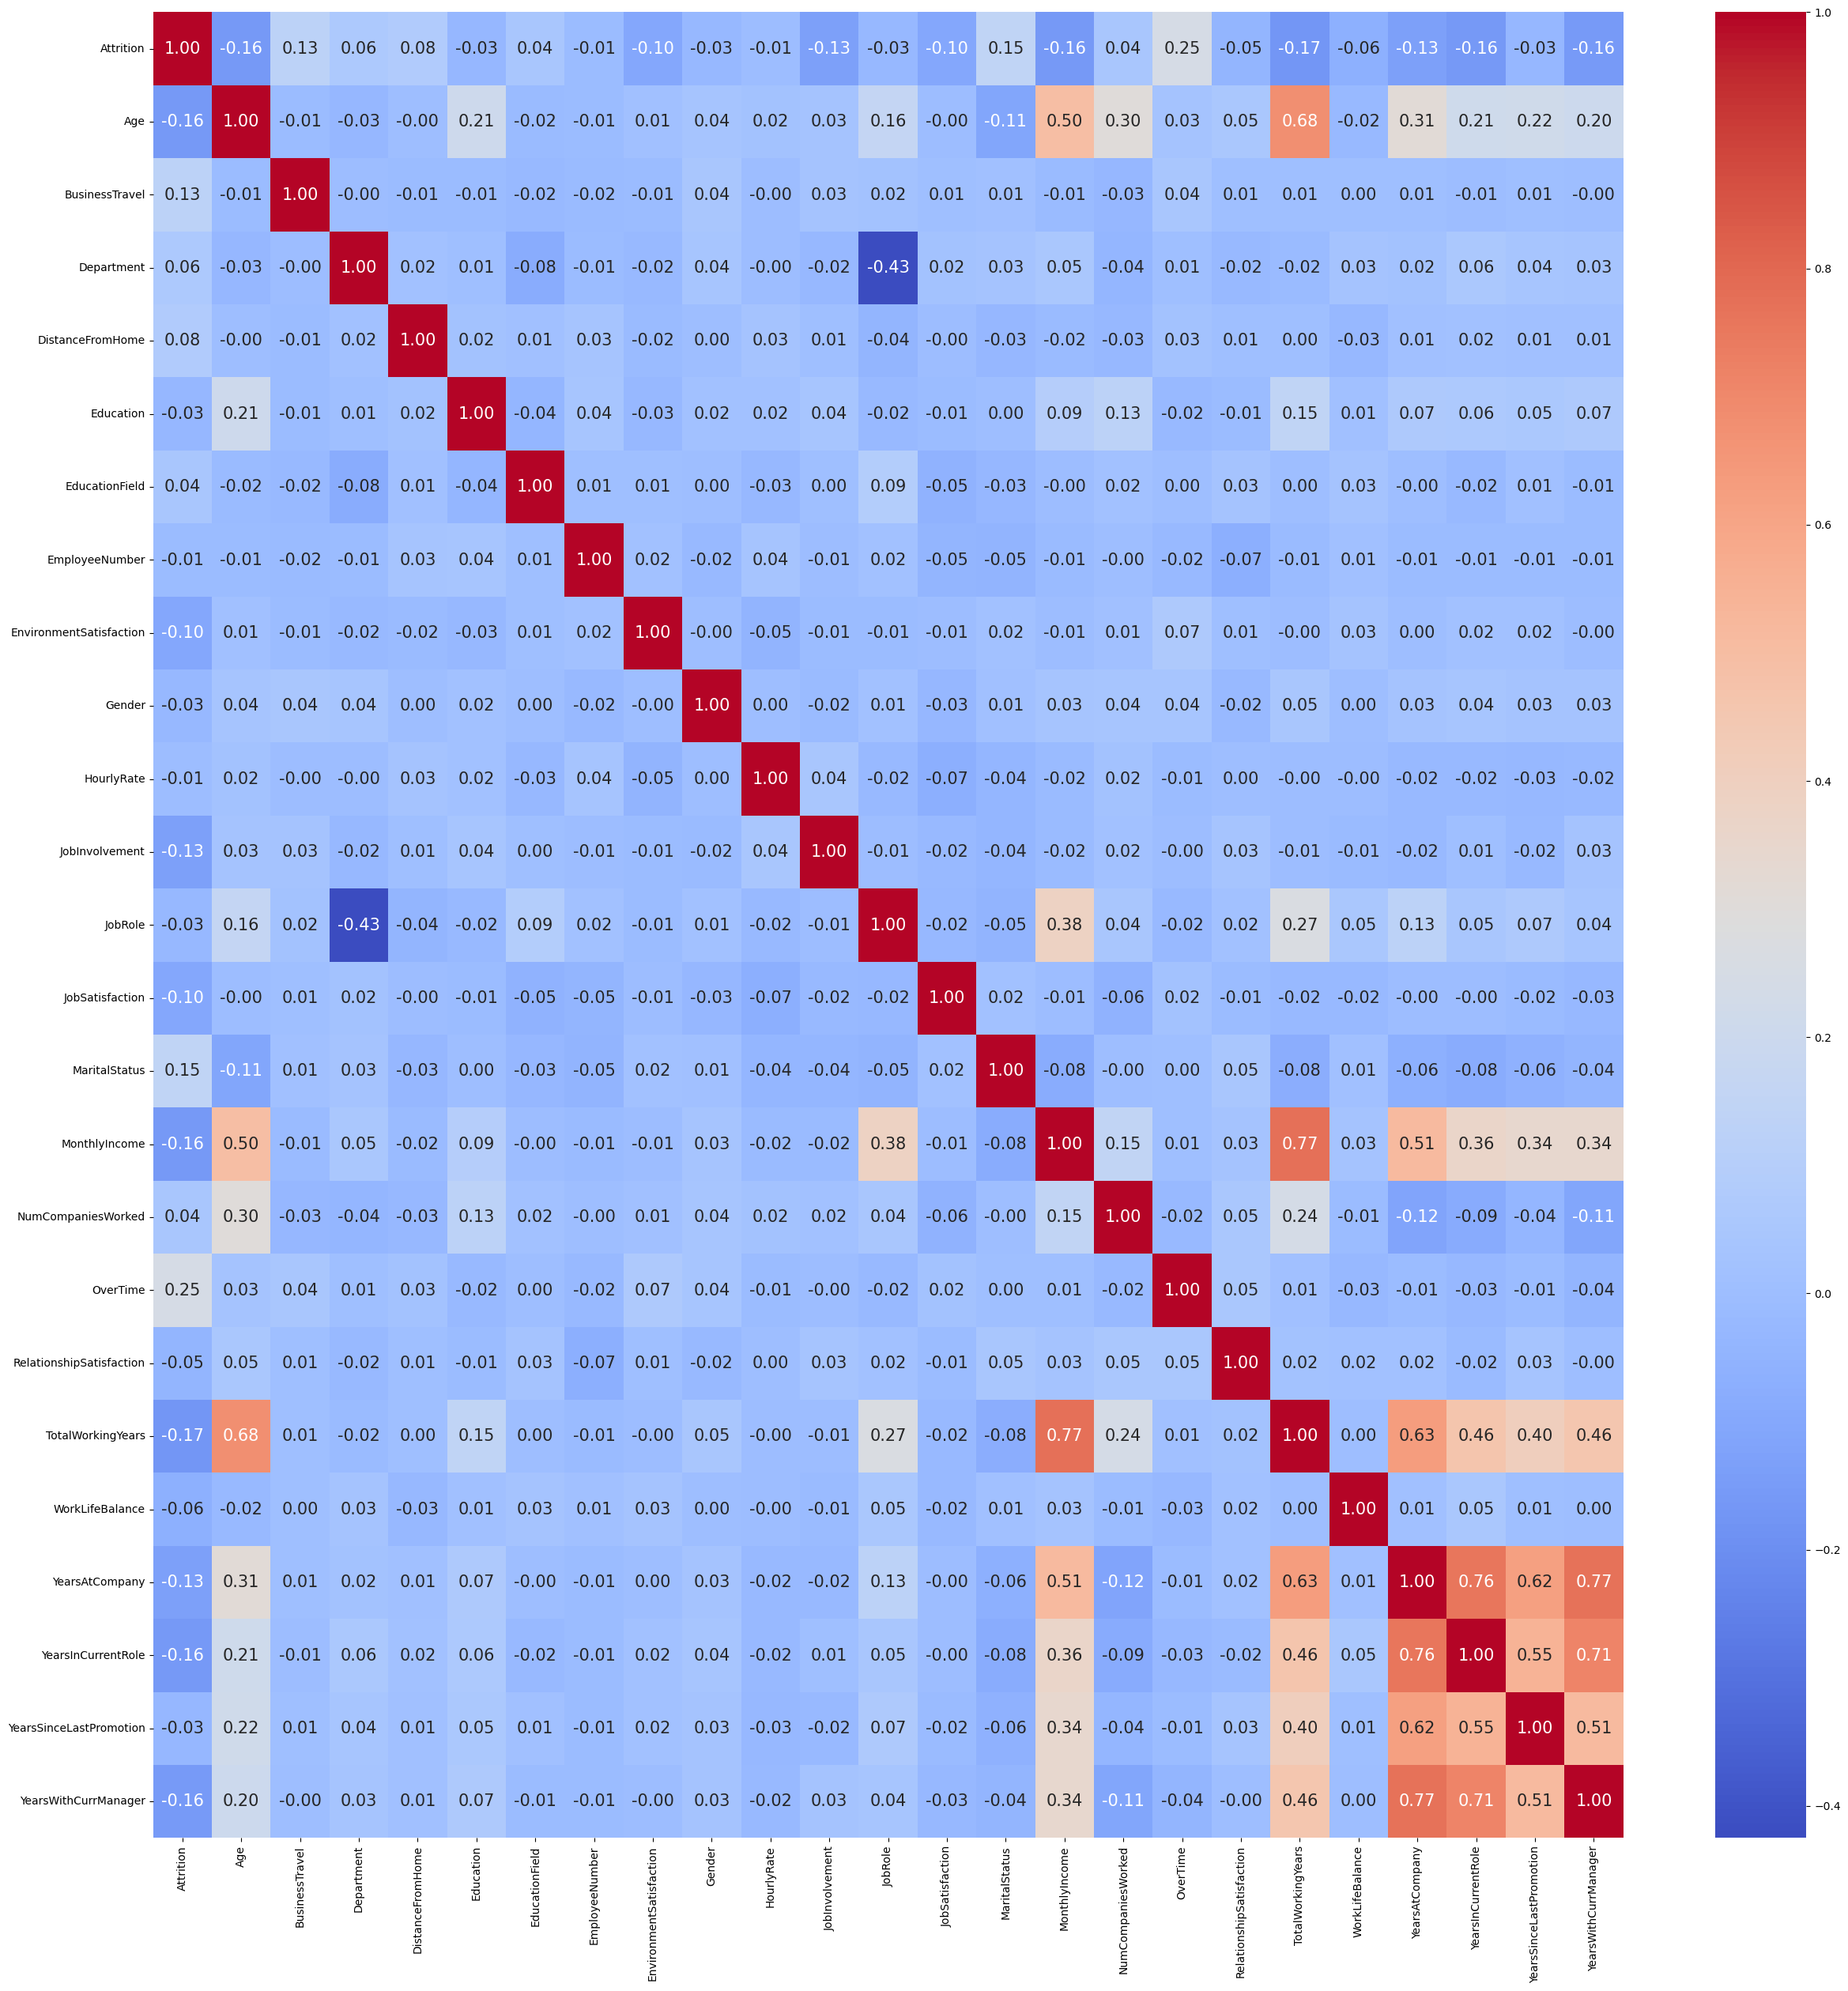

In [29]:
# Correlation Matrix

plt.figure(figsize=(30,30))
sns.heatmap(df2.corr(), annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size":15})